# Commercial Uses of Data -- CPL Version

### Background
In 2017, Instacart publicly released an anonymized dataset consisting of over 3 million Instacart orders with information from what was purchased and by whom (user ids) and when in the day and week purchases were made. Many retailers, including grocery stores, sell data to data brokers in order to better profile consumers.
 
### Assignment
**Using Instacart’s data, try to profile consumers and specific groups within the dataset. For a couple of options, you could try to find a particular demographic, such as millennials, or a group a health insurance company might deem as high-risk.** Included is example analysis code that starts off by pinpointing users who have ordered any kind of potato chips in more than 50% of their orders. 

You're free to use whatever tools you're comfortable with. [`pandas`](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) is a great library intended for fast data analysis and manipulation of large volumes; however, in this notebook, the included example of data analysis uses Berkeley's [`datascience`](http://data8.org/datascience/) module. 

To help clarify the content of the data, the Instacart data dictionary can be found [here](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b). It will be extremely useful in helping you understand the data you are working with -- it gives a description of each column for each of the tables.


### More Details
The CSVs within `instacart_data` folder can be opened with a [`table.read_table`](http://data8.org/datascience/_autosummary/datascience.tables.Table.read_table.html) method. Examples on how to do so are below.  

Here is a brief description of some elements of the more confusing (and larger!) CSVs:

`orders_subset` - Each row represents one order or trip to the grocery store. `order_number` refers to whether the order was the user’s first or fifteenth. `order_dow` refers to the day of week the order was placed with Saturday as 0 and Sunday as 1. This CSV contains a subset of the original data. 

`order_products__prior_subset` - Each row represents one product in an order. `add_to_cart_order` refers to the order in which the product was added to the cart. 

On data integrity, `order_products__prior_subset` holds the data of the subset of users found in `orders_subset`. `orders_subset` has unaltered data for 10% of the unique users found in the original `orders` CSV file. Original data can be downloaded [here](https://www.instacart.com/datasets/grocery-shopping-2017). 

### Caveat
When analyzing the data, especially with a large dataset, be sure to *filter* as much as possible the individual dataframes and then join as needed. In addition, when checking out what each CSV looks like, it’s recommended to use the **`show`** method, rather than loading the entire table — this might crash your notebook (e.g. `table.show(5)`). Note to run terminal commands such as *head* in Jupyter notebook, attach an exclamation point as a prefix to the command (e.g. `!head file.csv`)

### To help get you going...The following box is a "cell." 

You can cause Jupyter to execute its commands by selecting it (a blue frame will appear around it) and clicking the Run button.


In [1]:
# importing the packages that we'll need for 
# our most basic functionality
from datascience import *
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Import other libraries you would like to use below


The previous cell loaded the different libraries that Python needs in order to do our analysis. Now that they have been loaded, we can use the 'head' command.

Select the cell below and click run. It will show the "head" of the file `products.csv`.

You can also pass options to head by altering the cell. Edit the cell by double clicking it. The frame will turn from blue to green. Then just add -n 20 after !head so that it reads !head -n 20 instacart_data/products.csv

This will increase the number of lines displayed from 10 to 20.

In [3]:
!head -n 25 instacart_data/products.csv

product_id,product_name,aisle_id,department_id
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1
5,Green Chile Anytime Sauce,5,13
6,Dry Nose Oil,11,11
7,Pure Coconut Water With Orange,98,7
8,Cut Russet Potatoes Steam N' Mash,116,1
9,Light Strawberry Blueberry Yogurt,120,16
10,Sparkling Orange Juice & Prickly Pear Beverage,115,7
11,Peach Mango Juice,31,7
12,Chocolate Fudge Layer Cake,119,1
13,Saline Nasal Mist,11,11
14,Fresh Scent Dishwasher Cleaner,74,17
15,Overnight Diapers Size 6,56,18
16,Mint Chocolate Flavored Syrup,103,19
17,Rendered Duck Fat,35,12
18,Pizza for One Suprema  Frozen Pizza,79,1
19,Gluten Free Quinoa Three Cheese & Mushroom Blend,63,9
20,Pomegranate Cranberry & Aloe Vera Enrich Drink,98,7
21,Small & Medium Dental Dog Treats,40,8
22,Fresh Breath Oral Rinse Mild Mint,20,11
23,Organic Turkey Burgers,49,12
24,Tri-Vi-Sol® Vitamins A-C-and D Supple

Next we read in some of the csv's and store them as `Table` objects from the `datascience` package. This will incorporate more datasets for our exercise.

In [4]:
# Run this cell to open and read in some data files within instacart_data
orders = Table().read_table('instacart_data/orders_subset.csv')
orders_products = Table().read_table('instacart_data/order_products__prior_subset.csv')
products = Table().read_table('instacart_data/products.csv')

To take a peek at the data stored in the table, we can use the `.show(n)` method on the table, where `n` is the number of rows that you want to display.

In [5]:
# Taking a small look into the first four rows of products -- highly recommended to use .show for large tables 
products.show(120)

product_id,product_name,aisle_id,department_id
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cr ...,38,1
5,Green Chile Anytime Sauce,5,13
6,Dry Nose Oil,11,11
7,Pure Coconut Water With Orange,98,7
8,Cut Russet Potatoes Steam N' Mash,116,1
9,Light Strawberry Blueberry Yogurt,120,16
10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


### Analysis Example

To start with, the example seeks to find the group of Instacart users who've bought potato chips consistently. In this particular context, consistently is defined as more than 50% of a user's orders have potato chips in the cart. Using this potato-chip loving crowd, the example will then try to discover more interesting characteristics shared amongst the crowd in order to further profile and target the group. 

The `Table` method [`.where`](http://data8.org/datascience/_autosummary/datascience.tables.Table.where.html) is going to be extremely helpful in teasing out subsets of data. It is the primary way of filtering in `datascience`.

In [6]:
# Filtering products to just show products that fit into the category of snacks 
snacks = products.where('department_id', 19) # Why 19? How did I know that snacks are located in department 19? 
snacks

product_id,product_name,aisle_id,department_id
1,Chocolate Sandwich Cookies,61,19
16,Mint Chocolate Flavored Syrup,103,19
25,Salted Caramel Lean Protein & Fiber Bar,3,19
32,Nacho Cheese White Bean Chips,107,19
41,Organic Sourdough Einkorn Crackers Rosemary,78,19
56,Healthy Pop Butter Popcorn,23,19
59,Medium Taqueria Style Chipotle Salsa,50,19
77,Coconut Chocolate Chip Energy Bar,3,19
78,Nutter Butter Cookie Bites Go-Pak,61,19
93,Uncured Cracked Pepper Beef,23,19


The function in the following code cell filters the products table for products with names with specific phrases in them. To use the method, call the method with a case-insensitive string such as 'potato chips' and a table that contains at least the `product_name` column. The table could be products or another table filtered from products.

The function returns a table that shows products with the phrase in its name. If the table is empty, then perhaps
the phrase given was too specific. Consider trying the method again with a more general phrase. 

Examples of using the method:

    apple_sauce = find_products_by_phrase('apple sauce', products)
    toilet_paper = find_products_by_phrase('toilet paper', products)

In [7]:
def find_products_by_phrase(phrase, table):
    if type(phrase) != str:
        print("Make sure that the phrase has either single or double quotes around it!")
    if 'product_name' not in table.labels:
        print("Make sure that the table has a column exactly named product_name!")
    return table.where('product_name', lambda x: True if x.lower().find(phrase) != -1 else False)

In [9]:
potato_chips = find_products_by_phrase('potato chips', products)
potato_chips.show(15)

product_id,product_name,aisle_id,department_id
756,Malt Vinegar & Sea Salt Kettle Cooked Potato Chips,107,19
1182,Chile Limón Flavored Potato Chips,107,19
1594,Cheddar Bacon Mac & Cheese Flavored Potato Chips,107,19
1688,Sea Salted Reduced Fat Potato Chips,107,19
2034,Kettle Cooked 40% Less Fat Original Potato Chips,107,19
2052,"Potato Chips, Organic, Sea Salt",107,19
2302,Cheddar + Roasted Tomato Baked Potato Chips,107,19
2890,Reduced Fat Sour Cream & Onion Potato Chips,107,19
3102,"Potato Chips, Reduced Fat, Unsalted",107,19
3145,Plain Sweet Potato Chips,107,19


In [8]:
healthy = find_products_by_phrase('vegetables', products)
healthy.show(15) # Delicious...

product_id,product_name,aisle_id,department_id
241,Shrimp with Pasta & Vegetables,38,1
282,Oh My Cod! Cod Pate and Vegetables Cat Food,40,8
377,Chunky Beef with Vegetables & Brown Rice Dog Food,40,8
1175,Creamy Chicken Orzo with Mixed Vegetables,69,15
1663,Sausage Supreme Pizza with Fire Roasted Vegetables,79,1
1836,Organic Steamable Mixed Vegetables,116,1
1903,Chicken Noodle with Vegetables Soup,69,15
2595,"Tender white meat chicken, vegetables & rice in a chedda ...",38,1
2599,Organic Garden Vegetables with Herbs Soup,69,15
3101,Stir-Fry Vegetables,116,1


#### Now that we have our potato chips products, we're going to take a look at the users who have ordered them.
There are a couple of questions we need to answer before we can get to what we want. 
First question: How are we going to link what we found in `potato_chips` to the other tables? 
Second question: Which of the other tables should we be looking at? Which table first? 

We're going to answer the second question before the first. Because we want to have a specific group of users based on the content of their orders, we need to have a connection between orders (specifically products in each order) and users. Of the two tables that have information about orders, let's look at the column names to figure out exactly what type of information each has. 

In [14]:
orders.show(15)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2411567,11,prior,1,0,11,nan
1170872,11,prior,2,5,11,12
2840752,11,prior,3,5,10,14
1611810,11,prior,4,5,13,30
2921164,11,prior,5,5,11,30
790927,11,prior,6,5,11,7
1468214,11,prior,7,5,9,30
1483446,12,prior,1,1,12,nan
1247527,12,prior,2,5,9,30
1916106,12,prior,3,5,8,14


In [11]:
orders_products.show(27)

order_id,product_id,add_to_cart_order,reordered
6,40462,1,0
6,15873,2,0
6,41897,3,0
52,18963,1,0
52,24852,2,1
52,39408,3,1
52,49683,4,1
52,4485,5,0
66,3397,1,1
66,21955,2,1


It seems that the `potato_chips` table has `product_id` in common with the `orders_products` table. Also, the `orders_products` table shares `order_id` with the `orders` table. 

To circle back to the two questions: For the second question, we're going to look at the `orders_products` and `orders` tables in that order. For the first question, we're going to find the relevant `order_id`s in `orders_products` using the `product_id`s in table `potato_chips` and then filter `orders` to only contain those relevant `order_id`s. Let's do it! 

In the long line of code below, by using `.select`, `potato_chips` is made a smaller table with only the column `product_id`. Similarly, `orders_products` is made into a table with only two columns, `order_id` and `product_id`. 
Cutting down tables (temporarily) to only contain necessary information, then joining, decreases the 
amount of time it takes to perform the join. 

`orders_products_pchips` holds two columns, both of which are tied to the potato chips we found in our `potato_chips` table. The first column, `product_id`, refers to a specific kind of potato chip product. The second column, `order_id`, refers to the specific order a user placed one day. 

_Note: This cell will take approximately 30 seconds to run._

In [15]:
orders_products_pchips = orders_products.select('order_id', 'product_id')\
                                        .join('product_id', potato_chips.select('product_id'))
orders_products_pchips.show(5)

product_id,order_id
756,33936
756,1129552
756,1609886


Because `eval_set` and `days_since_prior_order` aren't of interest to us, those two columns were dropped from orders to make the table smaller upon execution of join. What results is a table arbitrarily named `pchips_orders_users` that 
connects users to their orders containing potato chips. 

In [17]:
pchips_orders_users = orders_products_pchips.join('order_id', orders.drop('eval_set', 'days_since_prior_order'))
pchips_orders_users.show(5)

order_id,product_id,user_id,order_number,order_dow,order_hour_of_day
610,6489,196148,25,0,15
829,19863,141625,7,1,10
1296,18288,135521,5,1,10
1855,22425,126787,3,1,13
2347,23645,114449,30,0,16


Now we want to filter `pchips_orders_users` to only contain the users who ordered some kind of potato chips at least
in 50% of their orders that exist in our data set. 

To get a group of users who fit the above criterion, we group `pchips_orders_users` to obtain the count or number of 
orders by user containing potato chips. Then using [`.group`](http://data8.org/datascience/_autosummary/datascience.tables.Table.group.html) and [`.join`](http://data8.org/datascience/_autosummary/datascience.tables.Table.join.html) between orders and itself to find the max order 
number or total number of orders placed by user. We join both of these tables to get the desired user ids. 

In [18]:
pchips_users = pchips_orders_users.group('user_id').relabel('count', 'pchip order count')\
                                .join('user_id', orders.select(['user_id', 'order_number']).group('user_id', max))
pchips_users.show(5)

user_id,pchip order count,order_number max
46,14,19
58,3,15
60,2,8
181,3,10
201,1,7


Here we add a column, `pchip_freq_buyer`, to the new `pchips_users` table which holds `True` if that user bought potato chips in more than half of his/her/their orders. 

In [19]:
pchips_users = pchips_users.with_column('pchip_freq_buyer', 
                            pchips_users.apply(lambda count, total: True if count/total > 0.5 else False, 
                                                                   ['pchip order count', 'order_number max']))
pchips_users.show(5)

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:471: FutureWarning: column lists are deprecated; pass each as an argument
  warnings.warn(


user_id,pchip order count,order_number max,pchip_freq_buyer
46,14,19,True
58,3,15,False
60,2,8,False
181,3,10,False
201,1,7,False


In [22]:
print("There are", pchips_users.where('pchip_freq_buyer', True).num_rows, 
                                                          "users who appear to be frequent buyers of potato chips!")

There are 188 users who appear to be frequent buyers of potato chips!


An overview of how we found our crisp-lovers:
1. Identified the `product_id` of different chips.
2. Selected the rows in `orders_products` where a chip `product_id` occurred.
3. Grouped the remaining rows to figure out which trips had a chip purchase.
4. Joined with `orders` on `order_id` so that we knew which user's trips had a chip purchase.
5. Grouped the number of chip trips for each user, so we knew their total number of potato purchases.
6. Compared that number to the total number of transactions the user made and filtered out those with >50%.

#### Next Steps
We're at the point where we have a table, pchips_freq_buyers, with which we can find all sorts of interesting characteristics about this population. At this point, hopefully you feel comfortable conducting your own analyses. If not, the following code will finish off, for now, this example. 

__In addition to `orders`, `orders_products`, and `products`, you have access to two other datasets (`aisles` and `departments`) located in the folder named `instacart_data`. If you wish to open those datasets, recall how we read products into a table.__

<em>Some low hanging fruit for you to explore includes taking the following visualizations that we make for our chip buyers and comparing them to all of the users.<em>

In [23]:
# Filtering pchips_orders_users to only contain users in pchips_users for which pchip_freq_buyer is True
pchips_freq_buyers = pchips_orders_users.join('user_id', 
                                              pchips_users.where('pchip_freq_buyer', True).select('user_id'))
pchips_freq_buyers.show(5)

user_id,order_id,product_id,order_number,order_dow,order_hour_of_day
46,31801,42987,2,1,13
46,244623,42987,11,0,12
46,398975,42987,8,1,12
46,821110,42987,7,1,12
46,1406544,42987,6,1,15


In [24]:
# Question: What's the most popular kind of potato chips amongst chip connoisseurs? 
popular_pchip_row = pchips_freq_buyers.group('product_id').sort('count', descending=True).row(0)
popular_pchip_id = popular_pchip_row[0]
print("Most popular kind among this user group is:", 
      products.where('product_id', popular_pchip_id).column('product_name')[0])

Most popular kind among this user group is: Sea Salt & Vinegar Potato Chips


### Some visualizations of the data findings: 
![alt text](images/example_analysis_1.png)
#### Compare the above with this table of bestsellers based on the entire original dataset: 
![alt text](images/compare_1_a.png)

![alt text](images/example_analysis_2.png)
![alt text](images/example_analysis_3.png)
#### Compare the above with these bar charts based on data the entire orders_subset: 
![alt text](images/compare_2.png)
![alt text](images/compare_3.png)

*The remaining code of the example is all about the visualizations shown here. Feel free to reference the code if you would like to build a horizontal bar chart or histogram.*

The next two cells can be used to visualize quantitative distributions.

Text(0.5, 0, 'DoW (0=Saturday, 1=Sunday)')

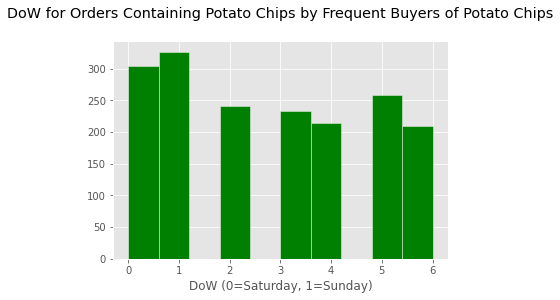

In [25]:
# histogram with custom title and x-label
plt.hist(pchips_freq_buyers.column('order_dow'), color='green')
plt.title('DoW for Orders Containing Potato Chips by Frequent Buyers of Potato Chips', y=1.08)
plt.xlabel('DoW (0=Saturday, 1=Sunday)')

Text(0.5, 0, 'Hour')

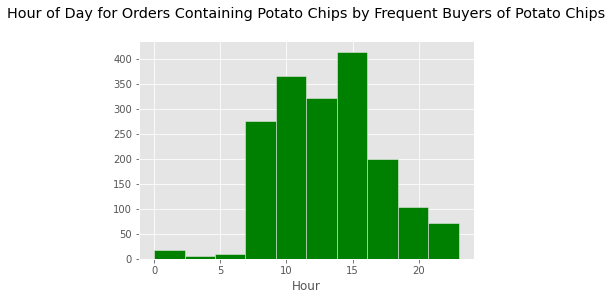

In [26]:
plt.hist(pchips_freq_buyers.column('order_hour_of_day'), color='green')
plt.title('Hour of Day for Orders Containing Potato Chips by Frequent Buyers of Potato Chips', y=1.08)
plt.xlabel('Hour')

Question: What other products are ordered frequently by this specific group of people?

In [27]:
# This cell will take a while
# Creating a table of just user id's of frequent buyers
freq_pchip_buyers_id = pchips_users.where('pchip_freq_buyer', True).select('user_id') 

# Getting the order ids 
freq_pchip_buyers_orders = orders.select(['user_id', 'order_id']).join('user_id', freq_pchip_buyers_id)

# Linking the order ids to product ids 
freq_pchip_buyers_productids = orders_products.select(["order_id", "product_id"])\
                                              .join('order_id', freq_pchip_buyers_orders)
    
# Linking product ids to product names
freq_pchip_buyers_products = freq_pchip_buyers_productids.select(['product_id'])\
                                                         .join('product_id', 
                                                               products.select(['product_id', 'product_name']))
     
# Getting the top 10 products most commonly purchased by this group of potato chip frequent buyers
# Note that the 'count' column refers to number of orders
freq_pchip_buyers_products = freq_pchip_buyers_products.group('product_name')\
                                                       .sort('count', descending=True)\
                                                       .take(np.arange(10))
freq_pchip_buyers_products

product_name,count
Banana,358
Bag of Organic Bananas,345
Organic Hass Avocado,259
Organic Baby Spinach,228
Limes,215
Large Lemon,195
Organic Strawberries,195
Sea Salt & Vinegar Potato Chips,183
Honeycrisp Apple,142
Sea Salt Potato Chips,135


<ipython-input-28-d51678a1fb38>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_pchip_buyers_products.column('product_name'))


Text(0.5, 1.08, 'Bestsellers Amongst the Potato-Chips Frequent Buyers')

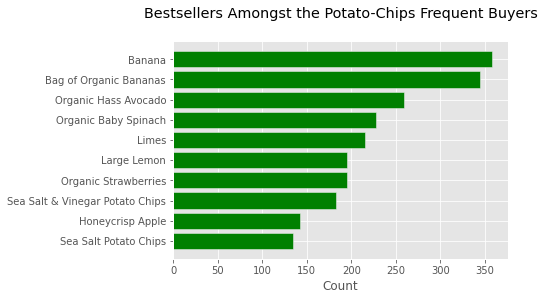

In [28]:
fig, ax = plt.subplots()
ypos = np.arange(10)
ax.barh(ypos, freq_pchip_buyers_products.column('count'), color='green')
ax.set_yticklabels(freq_pchip_buyers_products.column('product_name'))
ax.set_yticks(ypos)
ax.invert_yaxis() 
ax.set_xlabel('Count')
ax.set_title('Bestsellers Amongst the Potato-Chips Frequent Buyers', y=1.08)

# Now it's your turn!

Feel free to copy the models from above, then make slight modifications to explore a different question. Enter code in the following cell to get started. 

<em>Remember: You can either click `Insert > Insert Cell Below` or press `esc` and `b` to create new cells.

In [ ]:
# Your code here
fig, ax = plt.subplots()
ypos = np.arange(10)
ax.barh(ypos, freq_pchip_buyers_products.column('count'), color='green')
ax.set_yticklabels(freq_pchip_buyers_products.column('product_name'))
ax.set_yticks(ypos)
ax.invert_yaxis() 
ax.set_xlabel('Count')
ax.set_title('Bestsellers Amongst the Potato-Chips Frequent Buyers', y=1.08)


In [ ]:
plt.hist(pchips_freq_buyers.column('order_dow'), color='green')
plt.title('DoW for Orders Containing Potato Chips by Frequent Buyers of Potato Chips', y=1.08)
plt.xlabel('DoW (0=Saturday, 1=Sunday)')